# ResNet Model using 10 Epochs 

In [1]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [ ]:
#https://www.kaggle.com/code/emreiekyurt/bird-species-classification-with-deep-learning/

In [2]:
train_dir = '/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/data/train'
test_dir = '/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/data/test/'
val_dir = '/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/data/valid/'

In [3]:
data_dir = pathlib.Path("/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/data/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory 
#print(class_names)

In [4]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


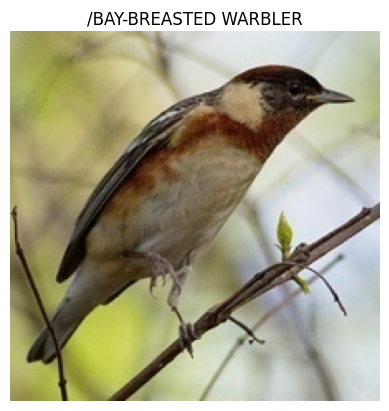

In [5]:
img = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        ) # or we can write nike instead of converse to see converse examples

In [11]:
img.shape

(224, 224, 3)

# Data Preprocessing

In [6]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (300,300),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (300,300),
                                               class_mode = "categorical")

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [7]:
img_height = 150
img_width = 150
epoch_num = 10

# inceptionV3

In [8]:
# 1. Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top= False,)

# 2. Freeze the base model
base_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(img_height,img_width,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

# 8. Combine the inputs with outputs into a model
model_p150_e10 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_p150_e10.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])

2022-10-27 13:41:55.969882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 13:41:55.970030: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Shape after passing inputs through base model: (None, 3, 3, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


In [9]:
history = model_p150_e10.fit(train_data,
                                 epochs=epoch_num,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)

model_p150_e10.summary()
                                 

Epoch 1/10


2022-10-27 13:42:01.344632: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 13:42:03.136300: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_4205/2212495256.py", line 1, in <module>
      history = model_p150_e10.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_4205/2212495256.py", line 1, in <module>
      history = model_p150_e10.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
	 [[model/output-layer/Softmax/_16]]
  (1) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_13994]

# ResNet

In [30]:
input_t = tf.keras.Input(shape=(32, 32, 3))
res_model = tf.keras.applications.ResNet50(include_top=False,
                                        weights="imagenet",
                                        input_tensor=input_t)

for layer in res_model.layers[:143]:
    layer.trainable = False

for i, layer in enumerate(res_model.layers):
    print(i, layer.name, "-", layer.trainable)

to_res = (224, 224)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Lambda(lambda image: tf.image.resize(image, to_res))) 
model.add(res_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))

0 input_4 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv - 

In [33]:
# 1. Create a base model with tf.keras.applications
res_model = tf.keras.applications.ResNet50(include_top=False,
                                        weights="imagenet")

# 2. Freeze the base model
res_model.trainable = False

#3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

#4. Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#5. Pass the inputs 
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

#7. Create the output activation layer
outputs = tf.keras.layers.Dense(450, activation = "softmax", name = "output-layer")(x)

Shape after passing inputs through base model: (None, 5, 5, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


In [36]:
# 8. Combine the inputs with outputs into a model
model = tf.keras.Model(inputs, outputs)

                                            
# 9. Compile the model
model.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics = ["accuracy"])

In [40]:
check_point = tf.keras.callbacks.ModelCheckpoint(filepath="cifar10.h5",
                                            monitor="val_acc",
                                            mode="max",
                                            save_best_only=True,
                                            )

model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.03),
                metrics=['accuracy'])

In [43]:
history = model.fit(train_data,
                    epochs=epoch_num,
                    steps_per_epoch = len(train_data),
                    validation_data = val_data,
                    validation_steps = int(0.25*len(val_data)))

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_2368/3729804314.py", line 1, in <module>
      history = model.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_2368/3729804314.py", line 1, in <module>
      history = model.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
	 [[model_1/output-layer/Softmax/_16]]
  (1) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_57174]

In [42]:
history = model.fit(train_data, batch_size=32, epochs=10, verbose=1,
                    validation_data=val_data,
                    callbacks=[check_point])

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_2368/3729804314.py", line 1, in <module>
      history = model.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/traitlets/config/application.py", line 982, in launch_instance
      app.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/rajwantkaur/.pyenv/versions/3.9.8/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2885, in run_cell
      result = self._run_cell(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in _run_cell
      return runner(coro)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3139, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3318, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/cb/b9692hr50mv06n5yp97v5cfw0000gn/T/ipykernel_2368/3729804314.py", line 1, in <module>
      history = model.fit(train_data,
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "/Users/rajwantkaur/neuefische/ds-capstone-for-the-birds/.venv/lib/python3.9/site-packages/keras/backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
	 [[model_1/output-layer/Softmax/_16]]
  (1) INVALID_ARGUMENT:  logits and labels must be broadcastable: logits_size=[32,450] labels_size=[32,400]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_57174]

2022-10-27 12:00:43.532421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 12:00:43.533138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

87924736/87910968 [==============================] - 13s 0us/step
Shape after passing inputs through base model: (None, 3, 3, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)
